## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#2 Check the shape of the DataFrame (rows, columns)

In [2]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (545, 13)


In [ ]:
#3 Look at the data types of the columns

In [4]:
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [ ]:
#4 Check for missing  values if any, replace with appropriate values

In [6]:
print("Missing values in each column:\n", df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

print("Missing values after handling:\n",df.isnull().sum())

Missing values in each column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Missing values after handling:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
#5 Prepare  X (independent variables) and y (dependent variable)

In [7]:
y = df['price']
x = df.drop(columns=['price'])

print("shape of x independent varaiable:", x.shape)
print("shape of y dependent varaiable:", y.shape)

shape of x independent varaiable: (545, 12)
shape of y dependent varaiable: (545,)


In [ ]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

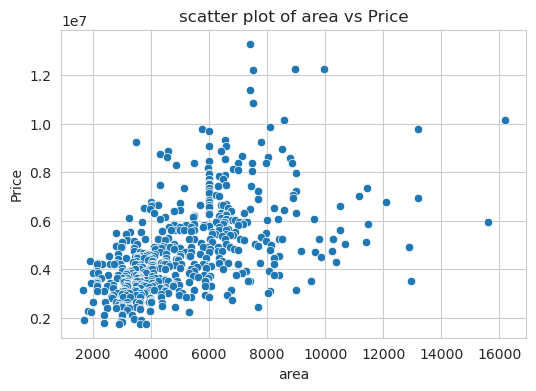

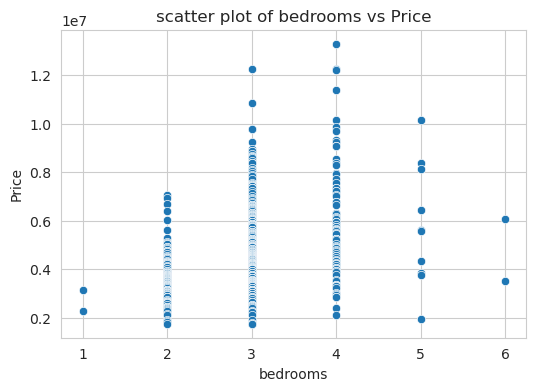

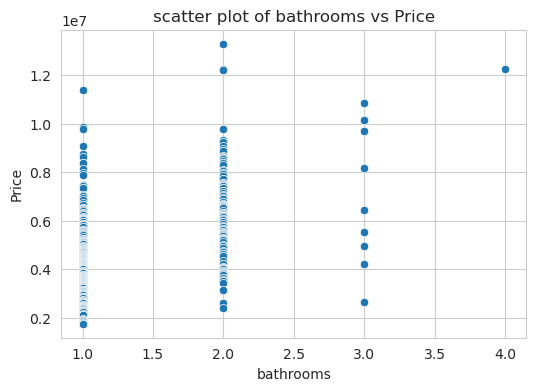

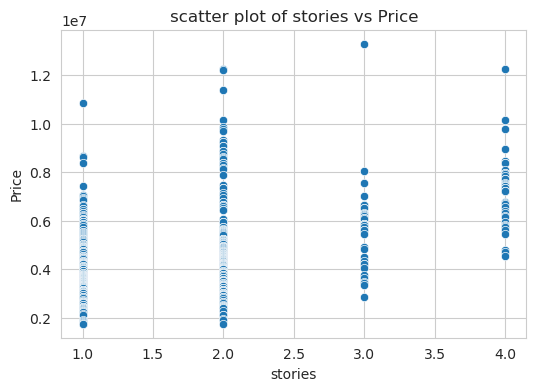

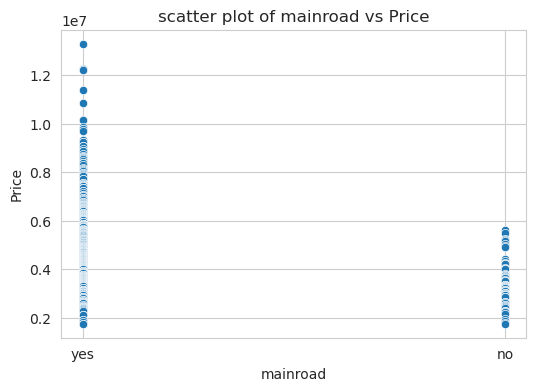

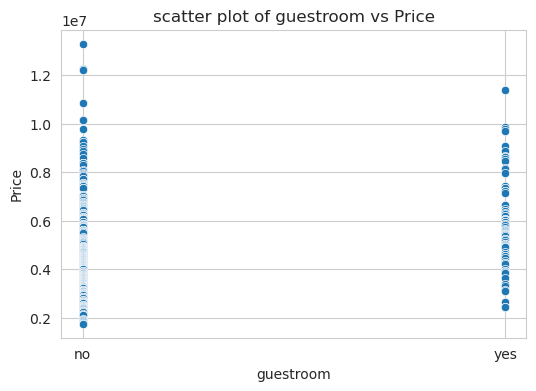

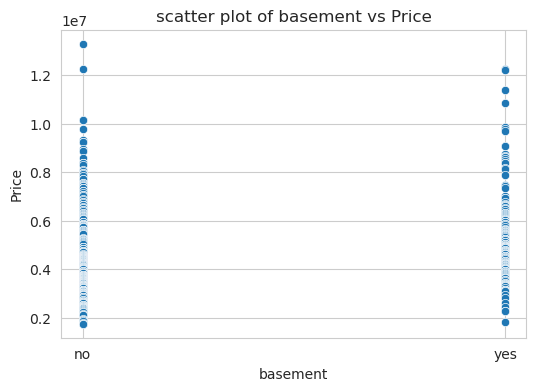

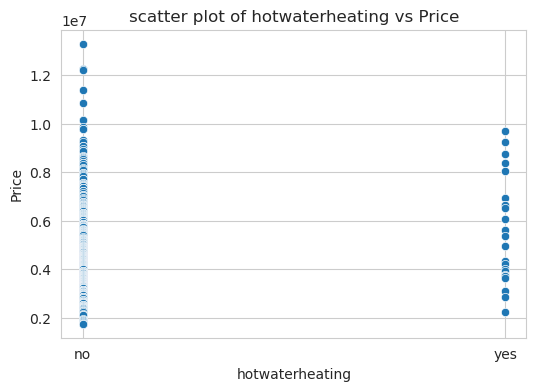

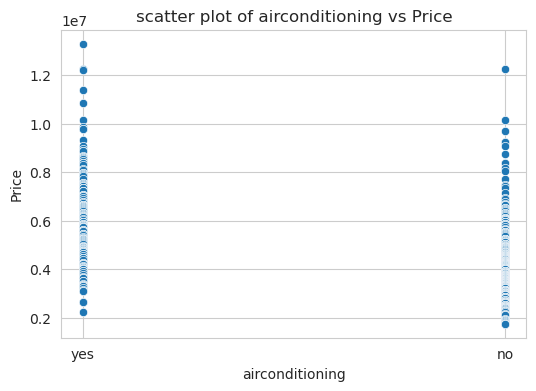

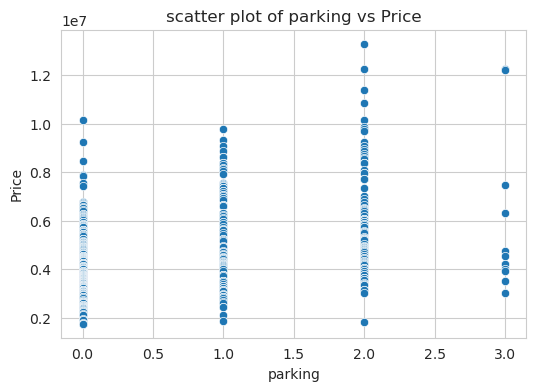

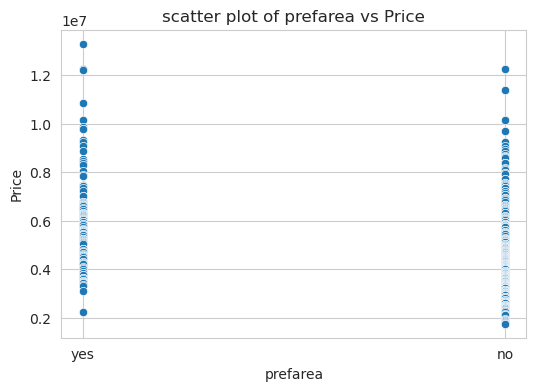

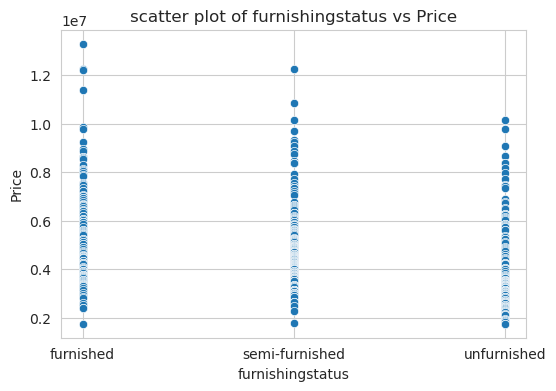

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

for column in x.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=x[column], y=y)
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.title(f"scatter plot of {column} vs Price")
    plt.show()

In [ ]:
#7 Encoding categorical data in X

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

categorical_columns = x.select_dtypes(include=['object']).columns
print("Categorical columns:",categorical_columns)

Categorical columns: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
#8  Avoiding the Dummy Variable Trap

In [13]:
x = pd.get_dummies(x, drop_first=True)
print("Transformed X shape:", x.shape)
print(x.head())

Transformed X shape: (545, 13)
   area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0  7420         4          2        3        2             1              0   
1  8960         4          4        4        3             1              0   
2  9960         3          2        2        2             1              0   
3  7500         4          2        2        3             1              0   
4  7420         4          1        2        2             1              1   

   basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
0             0                    0                    1             1   
1             0                    0                    1             0   
2             1                    0                    0             1   
3             1                    0                    1             1   
4             1                    0                    1             0   

   furnishingstatus_semi-furnished  furnish

In [ ]:
#9 Apply feature scaling on numerical variables

In [15]:
from sklearn.preprocessing import StandardScaler

numerical_columns = x.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


In [ ]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42) 

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (381, 13)
X_test shape: (164, 13)
y_train shape: (381,)
y_test shape: (164,)


In [25]:
#11 Fitting Multiple Linear Regression to the Training

In [27]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Get model coefficients and intercept
print("Model Coefficients:", model.coef_)  
print("Model Intercept:", model.intercept_)


Model Coefficients: [ 2.53287252e+02  8.08931413e+04  1.11475118e+06  4.17267580e+05
  3.03111236e+05  4.08073682e+05  2.75710533e+05  4.82603522e+05
  6.16375423e+05  6.85839346e+05  5.09192089e+05 -1.21652663e+05
 -3.91191241e+05]
Model Intercept: 95784.22911197226


In [29]:
#12 Predict on the train set and calculate the error = y_pred - y_train

In [31]:
y_train_pred = model.predict(x_train)
train_error = y_train_pred - y_train
print("First 5 training errors:\n", train_error.head())

First 5 training errors:
 126   -5.810803e+05
363   -1.098328e+05
370    8.121415e+05
31    -1.926221e+06
113    2.301975e+05
Name: price, dtype: float64


In [32]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

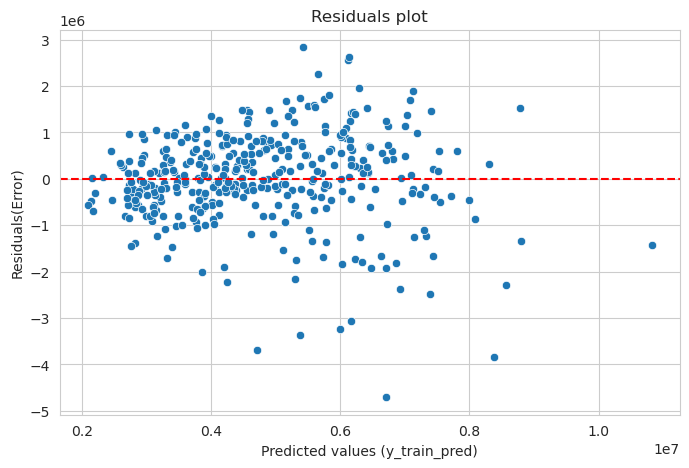

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_train_pred - y_train

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values (y_train_pred)")
plt.ylabel("Residuals(Error)")
plt.title("Residuals plot")
plt.show()

In [39]:
#14  Predic on the test set

In [41]:
# Predict on the test set
y_test_pred = model.predict(x_test)

# Display first few predicted values
print("First 5 Predictions on Test Set:\n", y_test_pred[:5])


First 5 Predictions on Test Set:
 [5372312.61614641 7069241.00525806 3099290.78784024 4526446.61703974
 3281573.61192656]


In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

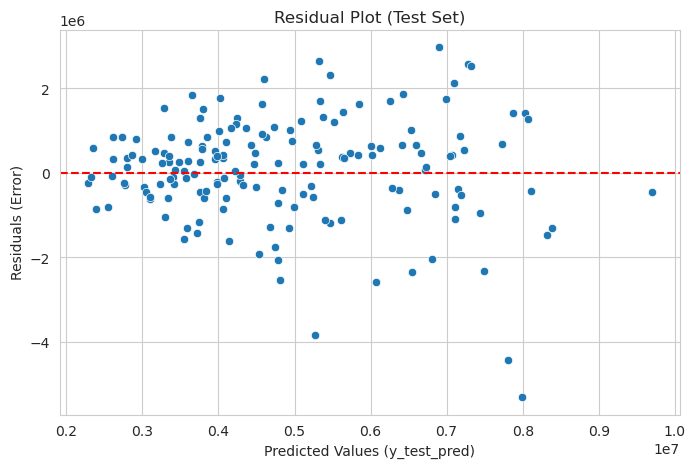

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (errors) for test set
test_residuals = y_test_pred - y_test

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0
plt.xlabel("Predicted Values (y_test_pred)")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot (Test Set)")
plt.show()


In [ ]:
#16 Print Mean Squared Error and R Squared Value

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_test_pred)

r2 = r2_score(y_test, y_test_pred)

print("Mean squared Error(MSE)",mse)
print("R-squared value(R2):",r2)

Mean squared Error(MSE) 1523019469501.2913
R-squared value(R2): 0.6463350878895877


In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)

In [46]:
def adjusted_r2(r2, n, p):
    return 1 - ((2 - r2) * (n - 1) / (n - p - 1))

In [48]:
n = x_test.shape[0]
p = x_test.shape[1]

adjusted_r2_value = adjusted_r2(r2, n, p)

print("Adjusted R-squared value:",adjusted_r2_value)

Adjusted R-squared value: -0.4709825378266479
